In [ ]:
#code for retrieving dataset for google collab, if needed
#!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

In [1]:
# Final Assignment
# By :  Arjun Suthaharan
# Student # : 991557894
# Dataset : white wine dataset
# Target : quality

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN

dataset = pd.read_csv("C:\\Users\\s-arj\\Desktop\\AI_Final_Assignment\\winequality-white.csv", sep=";")

# if running on collab use this declaration instead

#dataset = pd.read_csv("winequality-white.csv", sep=";")

dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [3]:
# check the shape of data

dataset.shape

# observing the shape, there are 4898 white wine entries overall, with 12 features for each entry

(4898, 12)

In [4]:
# counting each time a number appears in "quality" column

dataset['quality'].value_counts()

# observing the results, the quality values 0,1,2 and 10 do not show up at all in this entire dataset
# this will make training and testing more difficult, and create models with less accurate predictions and scores
# this will be mitigated using imbalance fixing algorithms during setup(), but it will still impact measures

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [5]:
# converting 'quality' column to categorical type
# this will then be converted back into integer as 3 to 0, 4 to 1, 5 to 2, 6 to 3, 7 to 4, 8 to 5 and 9 to 6 during setup() function call with 'label_encoded'
# this is done because of an out of range error that occurs with predict_model() since data for quality 0,1,2 and 10 don't exist

dataset['quality'] = dataset['quality'].astype('category')

In [6]:
# preparing the data by splitting it into 90% data to be used for the model and 10% data to be used for testing at the end

data = dataset.sample(frac=0.9, random_state=72)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4408, 12)
Unseen Data For Predictions: (490, 12)


In [7]:
from pycaret.classification import *

# creating the setup, using RandomOverSampler to minimize the imbalanced data, and minmax to normalize the dataset

exp_mclf101 = setup(data = data, target = 'quality', session_id=72, normalize = True, normalize_method='minmax', fix_imbalance = True, fix_imbalance_method=RandomOverSampler())

,Description,Value
0,session_id,72
1,Target,quality
2,Target Type,Multiclass
3,Label Encoded,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original Data,"(4408, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
# now to compare different models using this dataset by F1 Score and determine which is the best model for predicting 'quality'

best = compare_models(sort = 'F1')

# observing the results based on F1 score, Random forest has the highest percentage, followed by Extra Trees Classifier and lightGBM

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6473,0.2502,0.4270,0.6479,0.6414,0.4657,0.4673,0.1740
et,Extra Trees Classifier,0.6538,0.2503,0.4002,0.6690,0.6404,0.4563,0.4668,0.1300
lightgbm,Light Gradient Boosting Machine,0.6357,0.2437,0.4129,0.6341,0.6303,0.4509,0.4520,0.4160
dt,Decision Tree Classifier,0.5556,0.2001,0.3764,0.5578,0.5551,0.3450,0.3456,0.0110
gbc,Gradient Boosting Classifier,0.5040,0.2266,0.4041,0.5391,0.5055,0.3140,0.3219,1.3570
knn,K Neighbors Classifier,0.4976,0.2155,0.3957,0.5370,0.4980,0.3079,0.3170,0.2420
lda,Linear Discriminant Analysis,0.3258,0.2039,0.3290,0.4733,0.3554,0.1560,0.1676,0.0080
lr,Logistic Regression,0.3060,0.2065,0.3328,0.4845,0.3407,0.1512,0.1651,0.6280
nb,Naive Bayes,0.3536,0.1992,0.3417,0.4711,0.3377,0.1770,0.1967,0.0060
ada,Ada Boost Classifier,0.2843,0.1626,0.2464,0.3095,0.2413,0.0491,0.0628,0.0640


In [10]:
# creating model for random forest

rf = create_model('rf',random_state=72)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6570,0.0000,0.5079,0.6620,0.6503,0.4839,0.4849
1,0.6537,0.0000,0.4153,0.6407,0.6447,0.4822,0.4832
2,0.6343,0.8449,0.5010,0.6347,0.6276,0.4438,0.4467
3,0.6343,0.8197,0.3979,0.6340,0.6311,0.4524,0.4529
4,0.6440,0.8431,0.3600,0.6282,0.6315,0.4569,0.4591
5,0.6494,0.0000,0.4459,0.6576,0.6446,0.4649,0.4666
6,0.6688,0.0000,0.4450,0.6663,0.6612,0.4930,0.4953
7,0.6981,0.0000,0.4958,0.7054,0.6950,0.5389,0.5419
8,0.6396,0.0000,0.4386,0.6472,0.6345,0.4490,0.4508
9,0.6494,0.0000,0.3864,0.6483,0.6452,0.4715,0.4719


In [9]:
# creating model for extra trees classifier

et = create_model('et',random_state=72)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6828,0.0000,0.5051,0.7087,0.6698,0.5030,0.5128
1,0.6731,0.0000,0.3995,0.6651,0.6566,0.4943,0.4996
2,0.6505,0.8498,0.3364,0.6581,0.6358,0.4522,0.4614
3,0.6375,0.8259,0.3376,0.6422,0.6253,0.4345,0.4418
4,0.6214,0.8364,0.3270,0.6227,0.6035,0.4027,0.4137
5,0.6656,0.0000,0.4225,0.6864,0.6520,0.4719,0.4837
6,0.6494,0.0000,0.3999,0.6762,0.6327,0.4404,0.4563
7,0.6753,0.0000,0.4597,0.7038,0.6671,0.4876,0.5021
8,0.6331,0.0000,0.3947,0.6548,0.6217,0.4245,0.4327
9,0.6494,0.0000,0.4060,0.6549,0.6358,0.4482,0.4572


In [11]:
# creating model for Light Gradient Boosting Machine

lightgbm = create_model('lightgbm',random_state=72)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6634,0.0000,0.4344,0.6644,0.6562,0.4906,0.4923
1,0.6408,0.0000,0.4111,0.6340,0.6332,0.4676,0.4695
2,0.6537,0.8216,0.3704,0.6486,0.6473,0.4737,0.4762
3,0.5987,0.7937,0.3491,0.5975,0.5932,0.4036,0.4044
4,0.6440,0.8322,0.3829,0.6339,0.6342,0.4564,0.4602
5,0.6331,0.0000,0.4568,0.6382,0.6298,0.4517,0.4525
6,0.6039,0.0000,0.4232,0.6003,0.6000,0.4006,0.4014
7,0.6623,0.0000,0.5094,0.6714,0.6647,0.4985,0.4994
8,0.6266,0.0000,0.4278,0.6287,0.6228,0.4412,0.4417
9,0.5909,0.0000,0.3501,0.5972,0.5874,0.3811,0.3818


In [12]:
# Between the top three models, the Random Forest is the model with the highest F1 score overall

#tuning model for rf

tuned_rf = tune_model(rf, n_iter = 100,choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6181,0.0000,0.5073,0.6262,0.6139,0.4355,0.4371
1,0.6149,0.0000,0.4118,0.6226,0.6037,0.4456,0.4557
2,0.5858,0.8092,0.3564,0.5871,0.5806,0.3956,0.3995
3,0.5858,0.7945,0.3636,0.5863,0.5783,0.4043,0.4090
4,0.6019,0.8180,0.3624,0.5921,0.5941,0.4139,0.4157
5,0.5747,0.0000,0.4390,0.5813,0.5706,0.3797,0.3830
6,0.6039,0.0000,0.4233,0.5972,0.5959,0.4136,0.4163
7,0.5942,0.0000,0.4810,0.5998,0.5938,0.4117,0.4139
8,0.5844,0.0000,0.4463,0.5889,0.5789,0.3956,0.3994
9,0.5714,0.0000,0.3464,0.5766,0.5683,0.3756,0.3786


In [13]:
# tuning the model provides worse scores overall compared to the default model

# this was even after increasing iterations to 100 for a total of 100 * 10 = 1000 fits

#therefore we will return to the original model
tuned_rf = rf
print(tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=72, verbose=0,
                       warm_start=False)


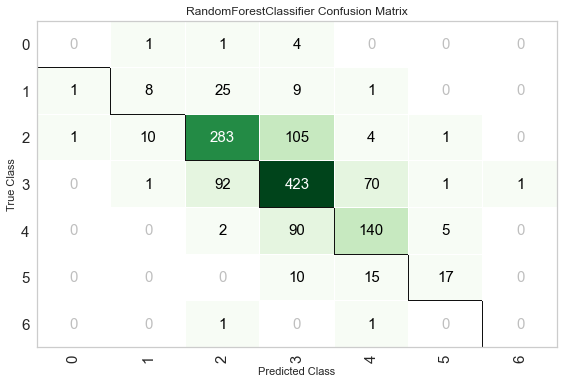

In [14]:
# Now to display the measures for tuned_rf

#The axis labeled 0,1,2,3,4,5,6 represent 3,4,5,6,7,8 and 9 quality levels, axis label cannot be changed in pycaret

plot_model(tuned_rf, plot = 'confusion_matrix')

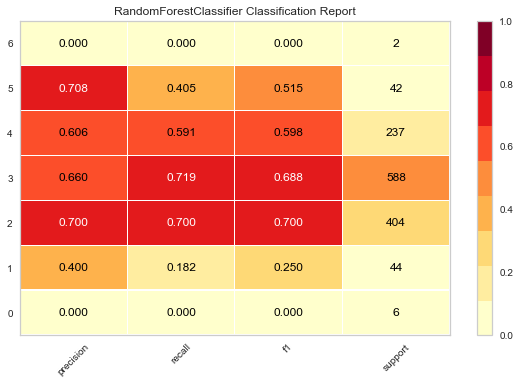

In [15]:
plot_model(tuned_rf, plot = 'class_report')

#The axis labeled 0,1,2,3,4,5,6 represent 3,4,5,6,7,8 and 9 quality levels, axis label cannot be changed in pycaret
# cannot change the axis labels in pycaret

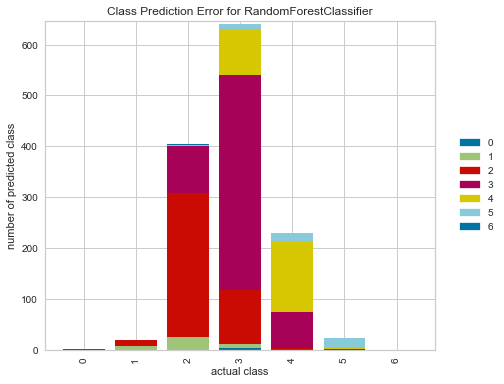

In [16]:
plot_model(tuned_rf, plot = 'error')

#The axis labeled 0,1,2,3,4,5,6 represent 3,4,5,6,7,8 and 9 quality levels, axis label cannot be changed in pycaret
# cannot change the axis labels in pycaret

In [17]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [18]:
predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6584,0.8508,0.3710,0.6516,0.6517,0.4816,0.4826


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
0,0.28,0.039216,0.168675,0.183871,0.134731,0.048951,0.218097,0.370419,0.722222,0.261905,0.258065,5,6,0.58
1,0.18,0.235294,0.192771,0.135484,0.086826,0.129371,0.410673,0.225960,0.462963,0.380952,0.483871,6,6,0.55
2,0.42,0.196078,0.240964,0.267742,0.107784,0.104895,0.317865,0.504097,0.629630,0.285714,0.209677,5,6,0.48
3,0.32,0.107843,0.295181,0.280645,0.053892,0.080420,0.285383,0.297112,0.250000,0.119048,0.483871,7,7,0.61
4,0.28,0.392157,0.072289,0.125806,0.113772,0.069930,0.178654,0.296249,0.129629,0.154762,0.161290,5,5,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,0.24,0.166667,0.216867,0.241936,0.098802,0.178322,0.396752,0.374733,0.333333,0.238095,0.193548,5,5,0.71
1319,0.28,0.156863,0.216867,0.138710,0.212575,0.024476,0.287703,0.305737,0.564815,0.178571,0.451613,6,5,0.48
1320,0.18,0.098039,0.162651,0.029032,0.230539,0.129371,0.310905,0.223804,0.712963,0.476191,0.451613,6,7,0.35
1321,0.37,0.098039,0.222892,0.019355,0.083832,0.045455,0.153132,0.210865,0.425926,0.488095,0.451613,5,5,0.37


In [23]:
final_rf = finalize_model(tuned_rf)

In [24]:
# final random forest parameters for deployment
print(final_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=72, verbose=0,
                       warm_start=False)


In [25]:
# now testing the finalized model using the test data, AKA the unseen data

test_predictions = predict_model(final_rf, data=data_unseen)
test_predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,6,0.70
1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,6,0.79
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,6,0.78
3,6.3,0.48,0.04,1.1,0.046,30.0,99.0,0.9928,3.24,0.36,9.6,6,4,0.57
4,6.5,0.31,0.14,7.5,0.044,34.0,133.0,0.9955,3.22,0.50,9.5,5,5,0.65


In [26]:
test_predictions.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
485,5.1,0.30,0.30,2.3,0.048,40.0,150.0,0.98944,3.29,0.46,12.2,6,7,0.51
486,6.1,0.34,0.29,2.2,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6,7,0.50
487,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6,6,0.49
488,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,6,0.59
489,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,7,0.54


In [29]:
# saving model

save_model(final_rf,'Final RF Model 03Dec2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='quality',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_l

In [30]:
# loading model

saved_final_rf = load_model('Final RF Model 03Dec2021')

Transformation Pipeline and Model Successfully Loaded


In [31]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

new_prediction.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,6,0.70
1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,6,0.79
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,6,0.78
3,6.3,0.48,0.04,1.1,0.046,30.0,99.0,0.9928,3.24,0.36,9.6,6,4,0.57
4,6.5,0.31,0.14,7.5,0.044,34.0,133.0,0.9955,3.22,0.50,9.5,5,5,0.65
